<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/25-1/Exercises/0314_Week2_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **모델 훈련 연습 문제**
___
- 출처 : 핸즈온 머신러닝 Ch04 연습문제 1, 5, 9, 10
- 개념 문제의 경우 텍스트 셀을 추가하여 정답을 적어주세요.

### **1. 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?**
___
확률적 경사하강법, 미니배치 경사하강법.

### **2. 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오차가 일정하게 상승되고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결할 수 있나요?**
___
모델이 과대적합되어 있다.
학습률을 낮추거나, 조기종료, epoch 크기 변경.

### **3. 릿지 회귀를 사용했을 때 훈련 오차가 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제인가요, 아니면 높은 분산이 문제인가요? 규제 하이퍼파라미터 $\alpha$를 증가시켜야 할까요 아니면 줄여야 할까요?**
___
과소적합.(높은 편향, 낮은 분산)

편향이 높아서 모델 복잡도를 높이기 위해 alpha를 줄어야 함.

### **4. 다음과 같이 사용해야 하는 이유는?**
___
- 평범한 선형 회귀(즉, 아무런 규제가 없는 모델) 대신 릿지 회귀
- 릿지 회귀 대신 라쏘 회귀
- 라쏘 회귀 대신 엘라스틱넷
___
- 과대적합을 감소시키기 위함.
- 릿지가 기본이 되지만, 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 더 나음.
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있으면 라쏘보다는 엘라스틱넷 활용.



### **추가) 조기 종료를 사용한 배치 경사 하강법으로 iris 데이터를 활용해 소프트맥스 회귀를 구현해보세요(사이킷런은 사용하지 마세요)**


---



In [ ]:
# 데이터 불러오기
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
# 0307 HM softmax regression code
X = iris['data'][:,(2,3)] # petal length (cm), petal width (cm)
y = iris['target']

In [ ]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X.shape # 2d

(150, 2)

In [ ]:
# 행렬 계산을 위해 intercept 항 추가
import numpy as np
intercept = np.ones([X.shape[0],1]) # 2d
print(intercept.shape)
XX = np.concatenate([intercept,X],axis = 1) # 2d, 2d array를 axis = 1 방향으로 병합
print(XX.shape)

(150, 1)
(150, 3)


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
random_indices = np.random.permutation(len(XX))

X_train = XX[random_indices[:90]]
y_train = y[random_indices[:90]]

X_val = XX[random_indices[90:120]]
y_val = y[random_indices[90:120]]

X_test = XX[random_indices[120:]]
y_test = y[random_indices[120:]]

In [ ]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [ ]:
y_train[:5]

array([0, 2, 2, 1, 0])

In [ ]:
to_one_hot(y_train[:5])

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_val)
Y_test_one_hot = to_one_hot(y_test)

In [ ]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [ ]:
lr = 0.19
epochs = 70000
n = len(X_train)
history = []

theta = np.random.randn(3, 3) #(특성2개+편향, 타겟 변수 개수)

for iteration in range(epochs):
    logits = X_train.dot(theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba), axis=1))
    error = Y_proba - Y_train_one_hot
    gradients = 1/n * X_train.T.dot(error)
    theta -= lr * gradients
    history.append(loss.item())

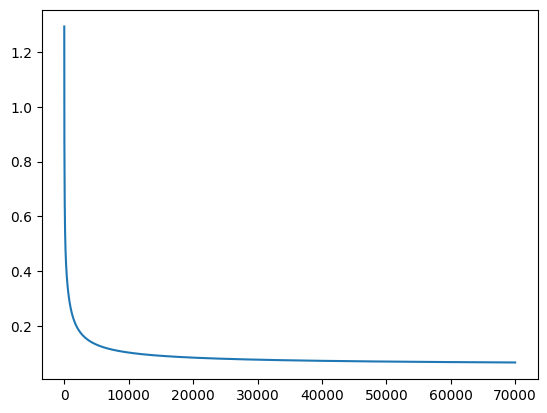

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history)

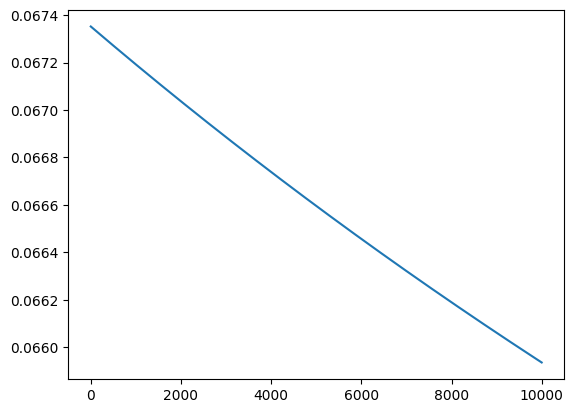

In [ ]:
plt.plot(history[60000:])

In [ ]:
theta

array([[ 22.31593102,   9.01542266, -31.62523962],
       [ -3.02693879,   0.15801976,   5.76977906],
       [ -8.80292241,  -1.43667414,   6.16225996]])

In [ ]:
X_train.shape

(90, 3)

In [ ]:
theta.shape

(3, 3)

In [ ]:
logits = X_val.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

0.9333333333333333

In [ ]:
# 조기 종료 추가 : 검증 에러가 최솟값에 도달하면 바로 훈련을 중지하는 것
minimum_loss = float('inf')

lr = 0.23
epochs = 70000
n = len(X_train)
history = []

theta = np.random.randn(3, 3)

for i in range(epochs):
    logits = X_train.dot(theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba), axis=1))
    error = Y_proba - Y_train_one_hot
    gradients = 1/n * X_train.T.dot(error)
    theta -= lr * gradients
    history.append(loss.item())
    if i % 5000 == 0:
        print(f"Epoch {i}, Loss: {loss:.5f}")
    if loss < minimum_loss:
        minimum_loss = loss
    else:
        print(i - 1, minimum_loss)
        print(i, loss, "조기 종료!")
        break

Epoch 0, Loss: 2.15053
Epoch 5000, Loss: 0.12197
Epoch 10000, Loss: 0.09628
Epoch 15000, Loss: 0.08580
Epoch 20000, Loss: 0.07990
Epoch 25000, Loss: 0.07605
Epoch 30000, Loss: 0.07331
Epoch 35000, Loss: 0.07126
Epoch 40000, Loss: 0.06965
Epoch 45000, Loss: 0.06836
Epoch 50000, Loss: 0.06729
Epoch 55000, Loss: 0.06640
Epoch 60000, Loss: 0.06564
Epoch 65000, Loss: 0.06498


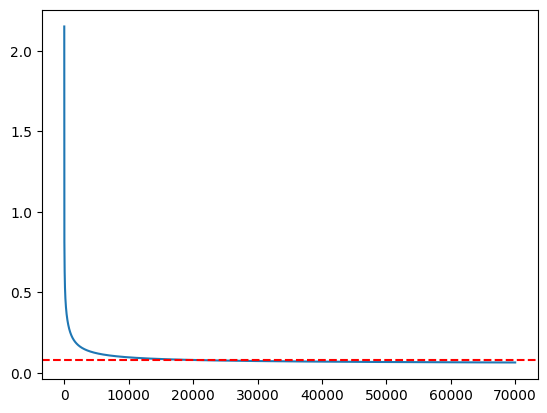

In [ ]:
plt.plot(history)
plt.axhline(y=0.079,color = 'r', linestyle = '--')

In [ ]:
logits = X_test.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9666666666666667